In [1]:
# In this Python notebook we attempt to evaluate numerical derivatives of a
# list of data.
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# First, we introduce the 'diff' function.  diff(x) will take list x and
# create a new list whose elements are equal to the difference between
# adjacent elements in x.  For example, let's make x a list from -10 to 10 in
# steps of 1.
xdata = np.arange(-10, 11, 1)
dx = np.diff(xdata)
xdata, dx

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

In [5]:
# In this case, dx is a list of ones.  Note that, because it is determined
# from a difference, the list dx is one element shorter than the list x.
print('length of x:', len(xdata))
print('length of dx:', len(dx))

length of x: 21
length of dx: 20


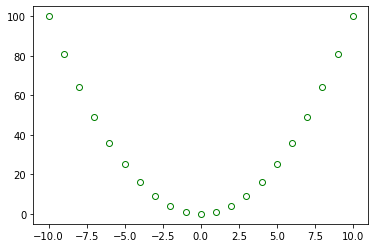

In [6]:
# Now let's make y = x^2 and plot y vs x.  The result is clearly a
# quadratic.
y = xdata**2
plt.plot(xdata, y, 'go', fillstyle = 'none');

In [7]:
# To evaluate the derivative of y with respect to x, we need to determine
# the change in y over the change in x.
dydx = np.diff(y)/np.diff(xdata)
print('dy/dx:', dydx)

dy/dx: [-19. -17. -15. -13. -11.  -9.  -7.  -5.  -3.  -1.   1.   3.   5.   7.
   9.  11.  13.  15.  17.  19.]


In [8]:
# We should expect dydx vs x to be a straigt line of slope 2.  To generate
# the plot, remember that we have to reduce the length of x by 1.
x1 = xdata[1:len(xdata)]
print('length of x1:', len(x1))

length of x1: 20


In [9]:
# We will fit the data to confirm the slope is about right.
def linearFunc(x, slope, intercept):
    y = slope*x + intercept
    return y
from scipy.optimize import curve_fit
a_fit, cov = curve_fit(linearFunc, x1, dydx)
print('The best-fit parameters are: (1) slope =', a_fit[0], 'and (2) intercept',\
      a_fit[1])

The best-fit parameters are: (1) slope = 2.0 and (2) intercept -0.9999999999999997


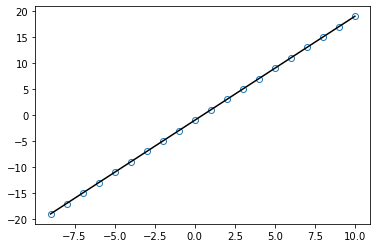

In [10]:
# Plot the numerical derivative and our fit line.
plt.plot(x1, dydx, 'o', fillstyle = 'none')
fitFcn = np.poly1d(a_fit)
plt.plot(x1, fitFcn(x1), 'k-');

In [11]:
# Notice from the fit that the slope is indeed 2, but the y-intercept is 1
# instead of the expected zero.  This is an artifact of taking derivatives
# of a discrete set of the data.  We can improve our results if we reduced
# the spacing between the x data.

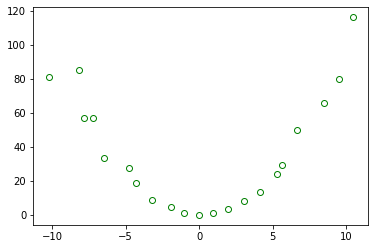

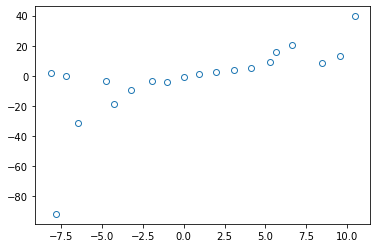

In [12]:
# Just for fun, let's add some noise to our data.  Let's suppose that the
# uncertainty in x is 10% and that dy = 2*x*dx.  'np.random.uniform()' 
# generates a random number uniformly distributed between 0 and 1.  
# You can confirm for yourself that a + (b - a)*np.random.uniform() generates 
# a random number between a and b.
xN = []
yN = []
for k in range(len(xdata)):
    xN = xN + [xdata[k] + 0.1*xdata[k]*(-1 + (1 - (-1))*np.random.uniform())]
    yN = yN + [xdata[k]**2 + 2*xdata[k]*0.1*xdata[k]*(-1 + (1 - (-1))*np.random.uniform())]
plt.plot(xN, yN, 'go', fillstyle = 'none')
dyNdx = np.diff(yN)/np.diff(xN)
xN1 = xN[1:len(xN)]
plt.figure()
plt.plot(xN1, dyNdx, 'o', fillstyle = 'none');

In [ ]:
# As you might have anticipated, taking the ratio of the differences between a
# pair of noisey datasets results in even more fluctuations.  Obtaining
# clean derivatives from discrete datasets requires precision measurements.